In [3]:
!pip install pandas numpy matplotlib seaborn scikit-learn


You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [7]:
data = pd.read_csv("fertilizer.csv")
data.head()


,Unnamed: 0,Crop,N,P,K,pH,soil_moisture
0,0,rice,80,40,40,5.5,30
1,3,maize,80,40,20,5.5,50
2,5,chickpea,40,60,80,5.5,60
3,12,kidneybeans,20,60,20,5.5,45
4,13,pigeonpeas,20,60,20,5.5,45


C:\Users\User\AppData\Local\Temp\ipykernel_25736\2206925691.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()  # Calculate correlations


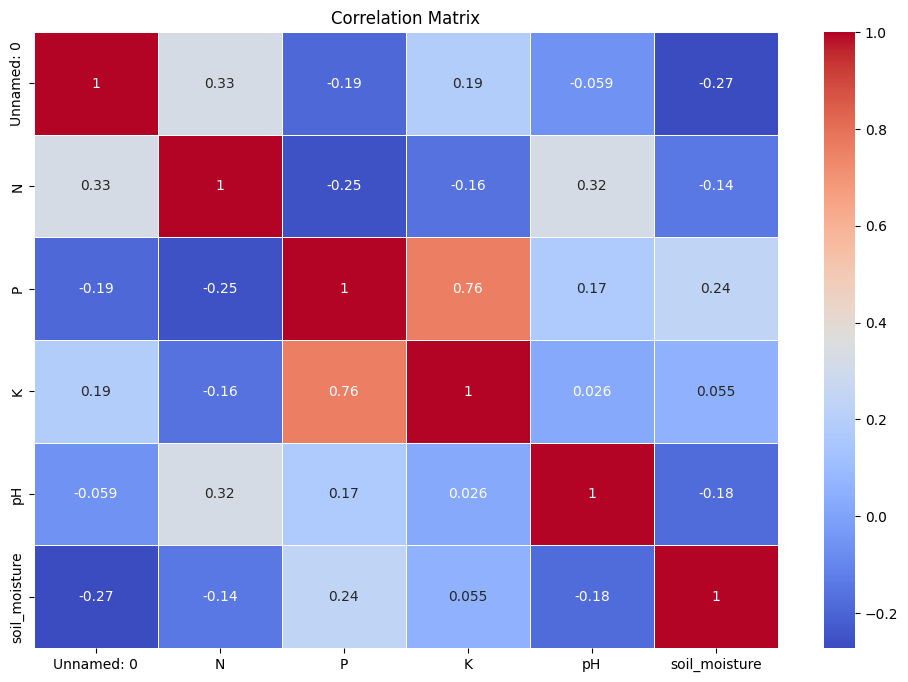

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()  # Calculate correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [16]:
# Display column names
print(data.columns)

# Get dataset summary
print(data.info())

# Check for missing values
print(data.isnull().sum())


Index(['Unnamed: 0', 'Crop', 'N', 'P', 'K', 'pH', 'soil_moisture'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     22 non-null     int64  
 1   Crop           22 non-null     object 
 2   N              22 non-null     int64  
 3   P              22 non-null     int64  
 4   K              22 non-null     int64  
 5   pH             22 non-null     float64
 6   soil_moisture  22 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.3+ KB
None
Unnamed: 0       0
Crop             0
N                0
P                0
K                0
pH               0
soil_moisture    0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_25736\2401152171.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Crop', data=data, palette='Set2')  # Change 'label' to correct name if needed


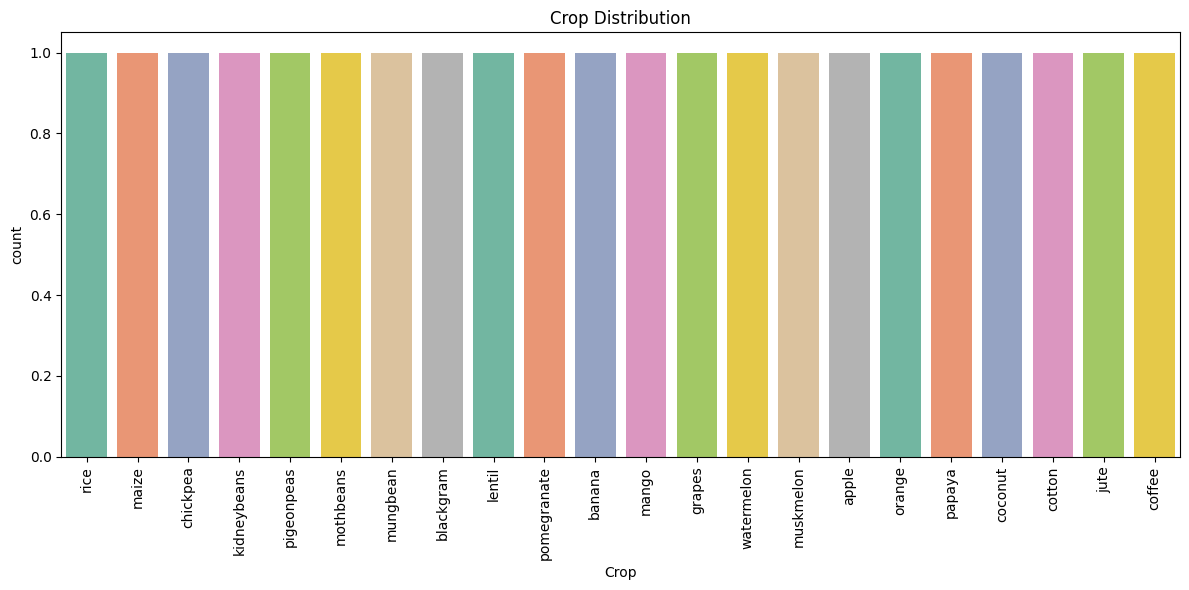

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Use the correct column name for crop labels
sns.countplot(x='Crop', data=data, palette='Set2')  # Change 'label' to correct name if needed

plt.title("Crop Distribution")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd

df = pd.read_csv('fertilizer.csv')

# Show duplicate rows
duplicates = df[df.duplicated()]
print("Duplicate rows:\n", duplicates)

# Count total duplicates
print("Number of duplicates:", df.duplicated().sum())


Duplicate rows:
 Empty DataFrame
Columns: [Unnamed: 0, Crop, N, P, K, pH, soil_moisture]
Index: []
Number of duplicates: 0


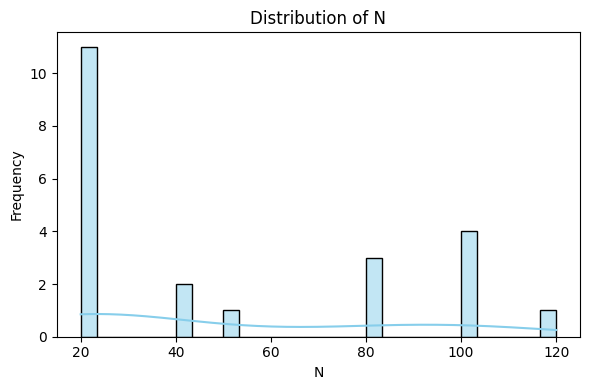

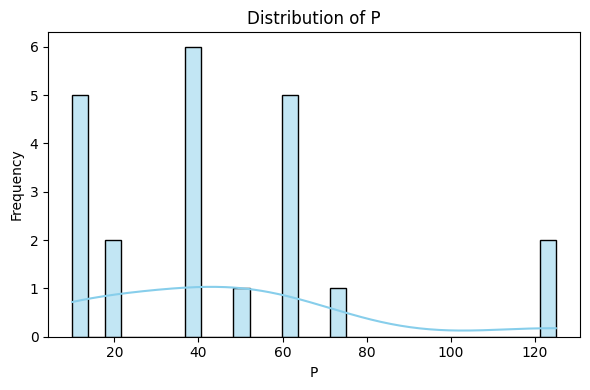

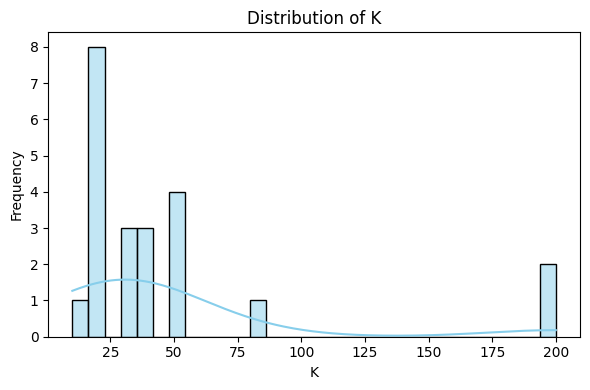

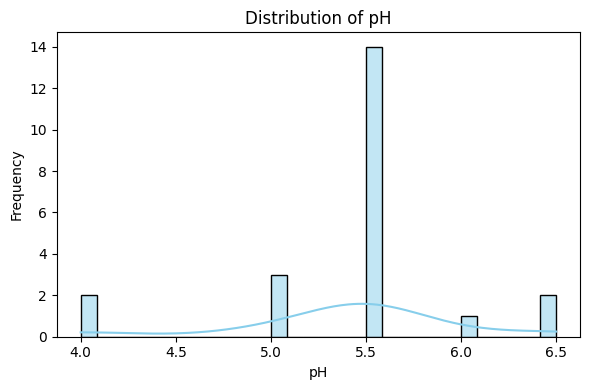

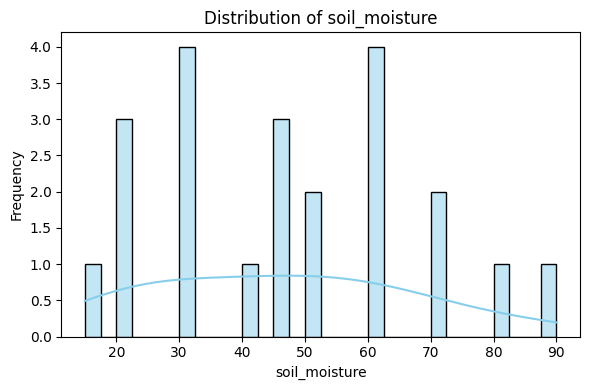

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['N', 'P', 'K', 'pH', 'soil_moisture']

# Plot distribution for each feature
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


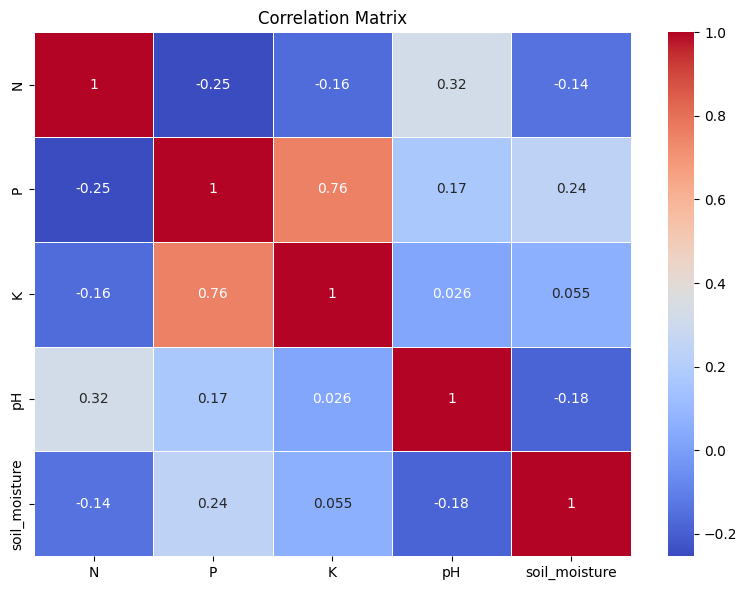

In [25]:
features = ['N', 'P', 'K', 'pH', 'soil_moisture']
corr_matrix = data[features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


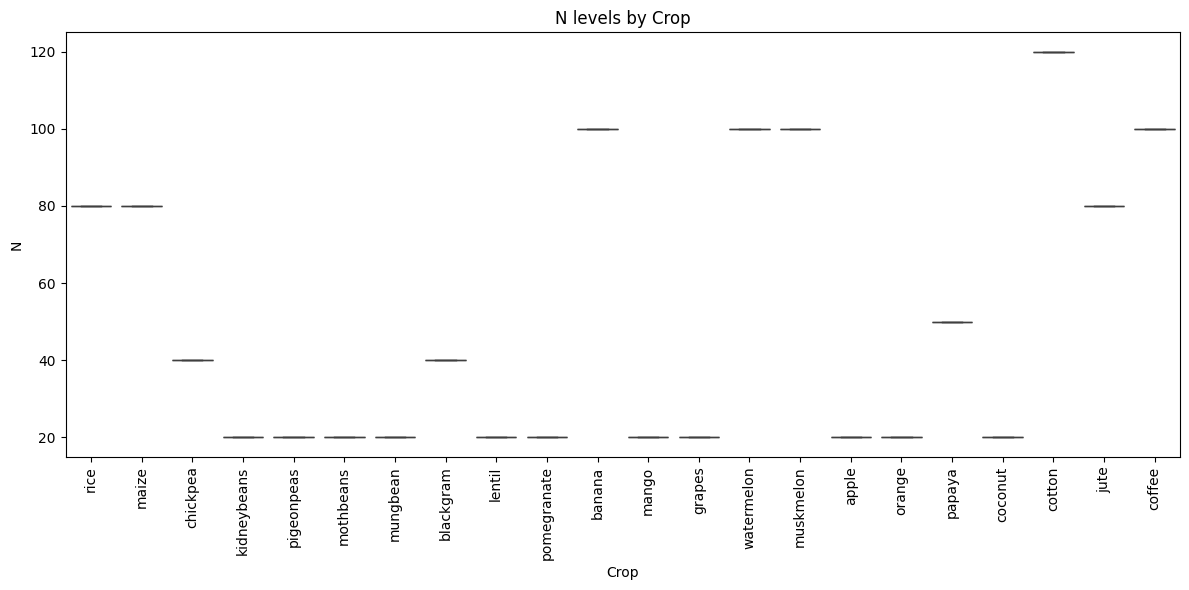

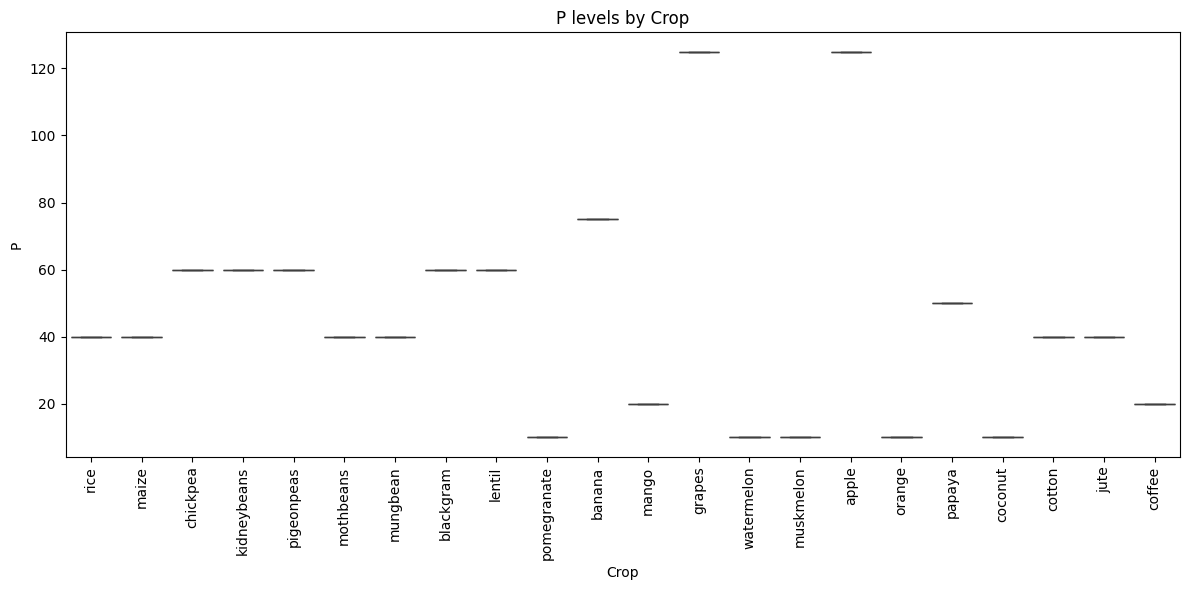

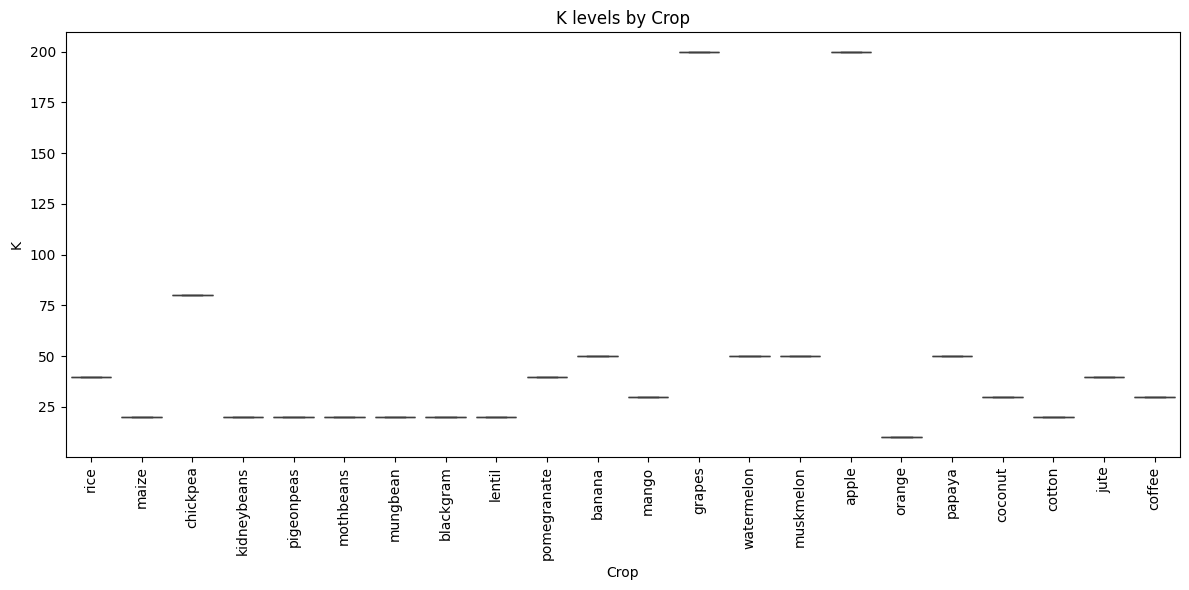

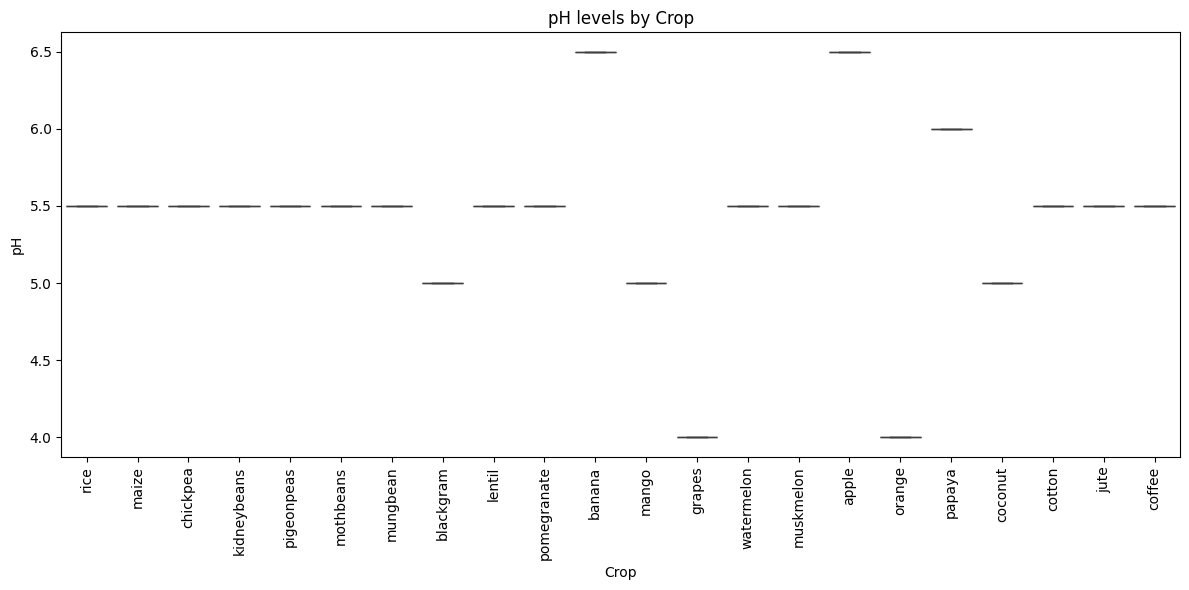

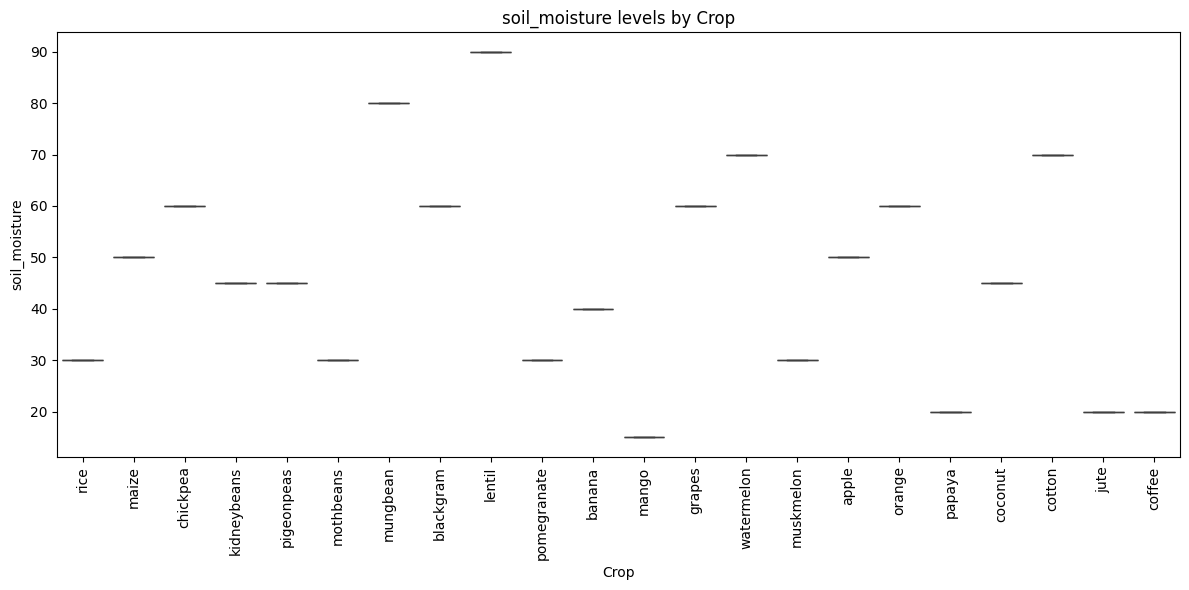

In [27]:
for feature in features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Crop', y=feature, data=data)
    plt.xticks(rotation=90)
    plt.title(f"{feature} levels by Crop")
    plt.tight_layout()
    plt.show()


In [28]:
group_stats = data.groupby('Crop')[features].agg(['mean', 'median', 'std'])
print(group_stats)


                 N                 P                 K              pH         \
              mean median std   mean median std   mean median std mean median   
Crop                                                                            
apple         20.0   20.0 NaN  125.0  125.0 NaN  200.0  200.0 NaN  6.5    6.5   
banana       100.0  100.0 NaN   75.0   75.0 NaN   50.0   50.0 NaN  6.5    6.5   
blackgram     40.0   40.0 NaN   60.0   60.0 NaN   20.0   20.0 NaN  5.0    5.0   
chickpea      40.0   40.0 NaN   60.0   60.0 NaN   80.0   80.0 NaN  5.5    5.5   
coconut       20.0   20.0 NaN   10.0   10.0 NaN   30.0   30.0 NaN  5.0    5.0   
coffee       100.0  100.0 NaN   20.0   20.0 NaN   30.0   30.0 NaN  5.5    5.5   
cotton       120.0  120.0 NaN   40.0   40.0 NaN   20.0   20.0 NaN  5.5    5.5   
grapes        20.0   20.0 NaN  125.0  125.0 NaN  200.0  200.0 NaN  4.0    4.0   
jute          80.0   80.0 NaN   40.0   40.0 NaN   40.0   40.0 NaN  5.5    5.5   
kidneybeans   20.0   20.0 Na

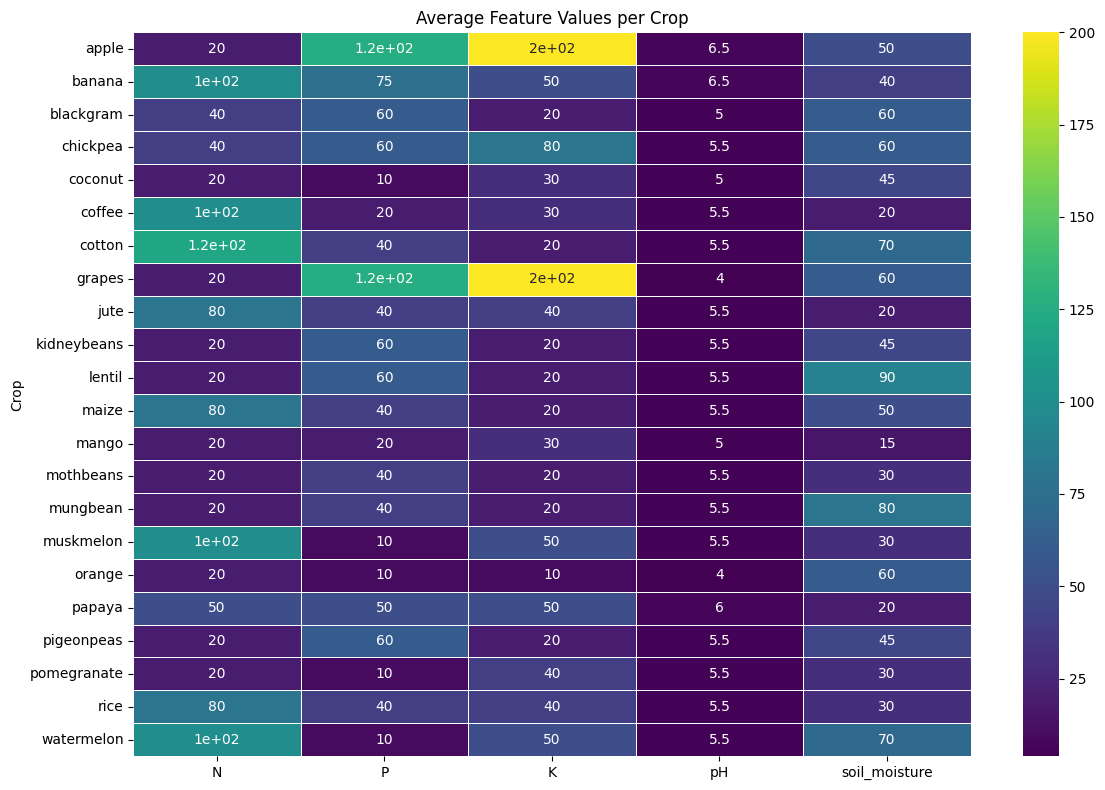

In [29]:
mean_values = data.groupby('Crop')[features].mean()

# Heatmap of average values per crop
plt.figure(figsize=(12, 8))
sns.heatmap(mean_values, annot=True, cmap='viridis', linewidths=0.5)
plt.title("Average Feature Values per Crop")
plt.tight_layout()
plt.show()


In [30]:
features = ['N', 'P', 'K', 'pH', 'soil_moisture']
X = data[features]
y = data['Crop']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)



In [37]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

unique_labels = sorted(set(y_test))
print(classification_report(
    y_test,
    y_pred,
    labels=unique_labels,
    target_names=[le.classes_[i] for i in unique_labels]
))


Accuracy: 0.0
              precision    recall  f1-score   support

       apple       0.00      0.00      0.00       1.0
      lentil       0.00      0.00      0.00       1.0
       maize       0.00      0.00      0.00       1.0
        rice       0.00      0.00      0.00       1.0
  watermelon       0.00      0.00      0.00       1.0

   micro avg       0.00      0.00      0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 